## Cluster Analysis in Python Part 3
>Part 2 - K-Means Clustering
## Basics of k-means clustering
Why k-means clustering
- A critical drawback of hierarchical clustering: runtime
- K means runs significantly faster on large datasets

**Step 1: Generate cluster centers**

kmeans(obs, k_or_guess, iter, thresh, check_finite)

- `obs`:  standardized observations
- `k_or_guess`: number of clusters
- `iter`  number of iterations (default: 20)
- `thres`: threshold (default: 1e-05)
- `check_finite`:  whether to check if observations contain only
<br>
Returns two objects: cluster centers, distortion

**Step 2: Generate cluster labels**

- `obs`:  standardized observations
- `code_book`: cluster centers
- `check_finite`:  whether to check if observations contain only

Returns two objects: cluster centers, distortioners

**A note on distortions**
- `kmeans` returns a single value of distortions
- `vq` returns a list of distortions

### Exercise - K-means clustering

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
comic_con = pd.read_csv('datasets/comic_con.csv', index_col=0)
comic_con.head(2)

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015


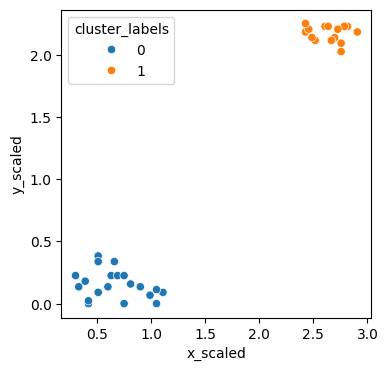

In [6]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], 2,check_finite=True)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']], cluster_centers, check_finite=True)

# Plot clusters
plt.figure(figsize=(4,4))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [8]:
%timeit kmeans(comic_con[['x_scaled','y_scaled']], 2,check_finite=True)

6.15 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## How many clusters?
**How to find the right k?**
- No absolute method to find right number of clusters (k) in k-means clustering
- There are indicative methods

**Distortions revisites**
- Distortion: sum of squared distances of points from cluster centers
- Decreases with an increasing number of clusters
- Become zero when the number of clusters equals the number of points
- Elbow plot: line plot between cluster centers and distortion

**Elbow Method**
- Elbow plot: plot of the number of clusters and distortion
- Elbow plot helps indicate number of clusters present in data

### Exercise - Elbow method on distinct clusters
Let us use the comic con dataset to see how the elbow plot looks on a dataset with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

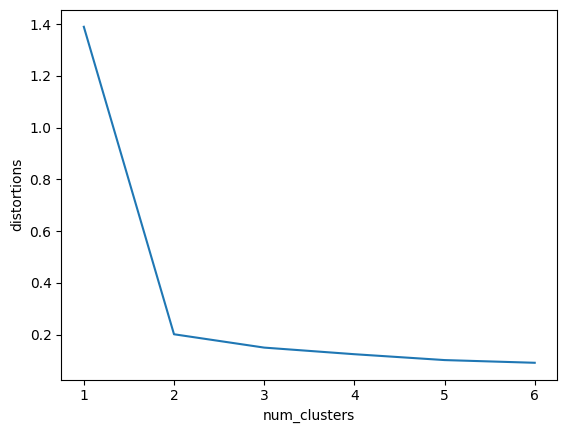

In [9]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i, check_finite=True)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

From the elbow plot, there are **2 clusters** in the data

### Exercise - Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a dataset with uniformly distributed points. You may want to display the data points in the IPython Shell before proceeding with the exercise.

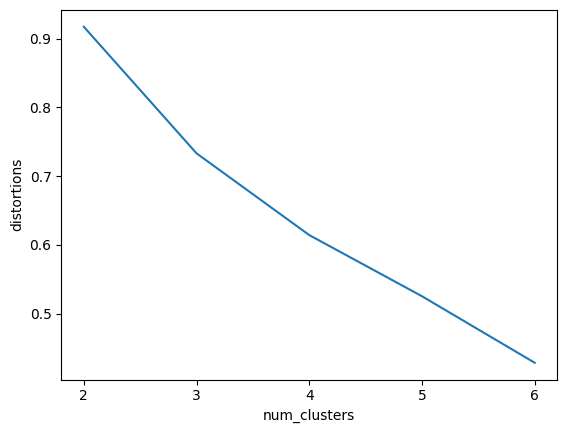

In [11]:
# Import uniform data
uniform_data = pd.read_csv('datasets/uniform_data.csv', index_col=0)

distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']], i, check_finite=True)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

Number of clusters can't be determined

## Limitations of k-means clustering
- How to find the right _K_ (number of clusters)
- Impact of seeds
    - As the process of defining the initial cluster centers is random, this initialization can affect the final clusters. Therefore, to get consistent results when running k-means clustering on the same dataset multiple times, it is a good idea to set the initialization parameters for random number generation. The seed is initialized through the seed method of random class in numpy. You can pass a single integer or a 1D array as an argument. Let us see the results of k-means clustering when we pass two different seeds before running the algorithm.
- Biased towards equal sized clusters
### Exercise - Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

Import the random class from numpy and initialize the seed with the integer `0`.

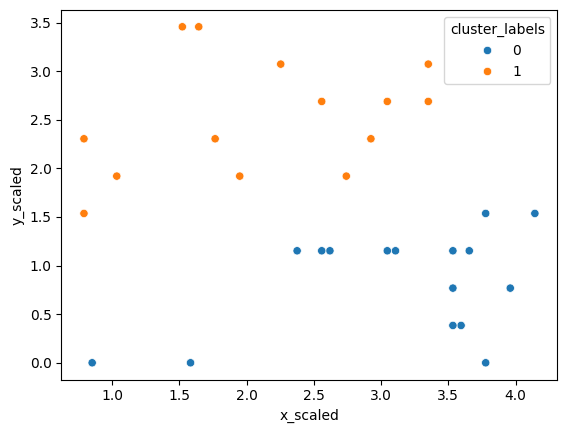

In [12]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Change your code from the earlier step so that the seed is initialized with a list `[1, 2, 1000]`.

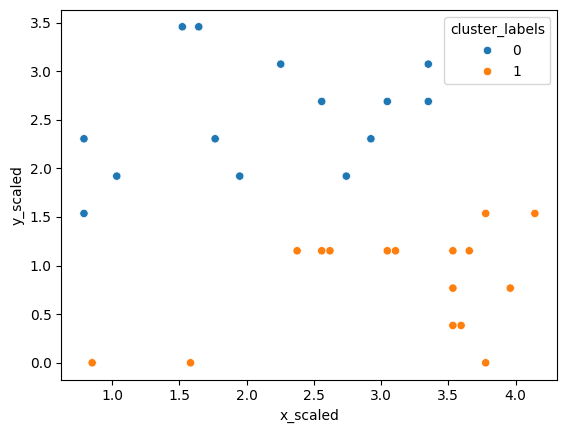

In [13]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Exercise - FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:
- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a play

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.ta.ata.

In [17]:
from scipy.cluster.vq import whiten
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

                scaled_def  scaled_phy
cluster_labels                        
0                 2.067430    9.055970
1                 1.946013    7.159409
2                 3.814488    9.023955


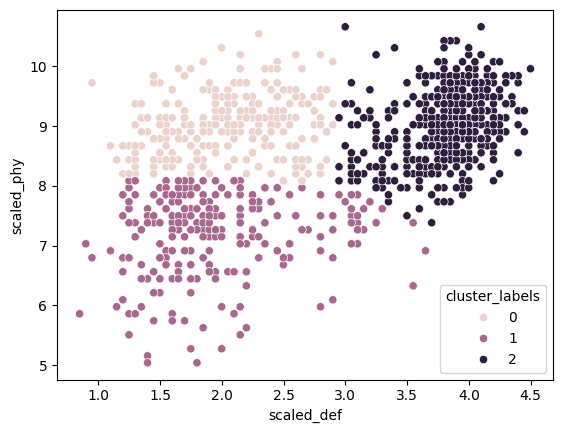

In [18]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()